# Introduction
Logistic regression is a supervised ML algorithm that is used when the dataset has a target variable that is of categorical type. It performs the task of classification.

The equation of line is used to build the model that performs the task of classification. This divides the plane into 2 parts with each half containing the points belonging to the same class. This description is merely for understanding and is not true (entirely).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (20, 5)

# Step Funtion as the Activation Function for Logistic Regression
Step function, also known as a Heaviside function, is a mathematical function that outputs a specific value based on whether the input is less than, equal to, or greater than a certain threshold.

Meaning the function outputs a certain value (usually 0) when input is less than 0, and another value (usually 1) when the input is greater than 0. In other words, the function outputs a constant value (usually 0 or 1) for a certain range of input values.

Mathematically, the equation of the straight line is given by,

$y = w^T x + w_0$

Where,
- $y \in (-\infty, \infty)$

According to step function, $f(y) = {0, 1}$. Therefore, $f(y) = \begin{cases}1, & \text{if } y \geq 0, \\0, & \text{if } y < 0.\end{cases}$.

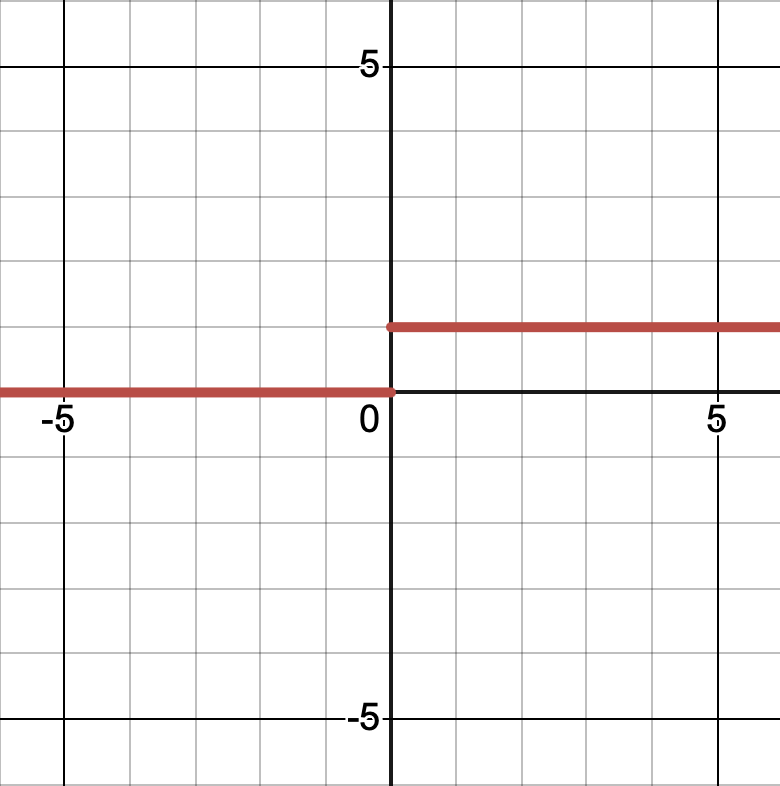

### Limitations of step function
- A step function outputs a 0 or 1 abruptly, with no values in between. This makes it difficult to model the gradual change in probabilities that logistic regression aims for.
- The step function has a zero gradient everywhere except for the transition point. This is problematic for gradient descent based optimization algorithms used to train logistic regression models. Without a smooth gradient, the model wouldn't be able to learn effectively through back-propagation.

### What is back propagation?
Back propagation is a technique used to efficiently train models like logistic regression with gradient descent.

Breakdown of how back propagation works,
1. Forward pass: Data goes through the model, calculations are made at each layer, and a final prediction is generated.
2. Error calculation: The difference (error) between the prediction and the actual class label is calculated.
3. Backward pass: The error is propagated backward through the model, layer by layer. At each layer, the gradient (rate of change) of the error with respect to that layer's weights and biases is calculated.
4. Weight update: Using these gradients, the weights and biases of the model are adjusted in a small way to minimize the overall error.

Imagine rolling a ball down a hill, back propagation helps in finding the steepest path (by calculating the gradients) to adjust the landscape (weights and biases) and get the ball (error) to the bottom (minimize).

This iterative process of forward pass, error calculation, backward pass, and weight update continues until the model reaches a desired level of accuracy. The smooth gradient of sctivation function (like sigmoid) is crucial for back propagation to work effectively.

# Sigmoid Function as the Activation Function for Logistic Regression
The sigmoid function, also known as the logistic function, or squashing function, is a mathematical function widely used as the activation function in ML models, particularly in logistic regression for classification tasks. The sigmoid function takes a real number as input, and squashes it to a value between 0 and 1. The function's output smoothly transitions from 0 to 1 as the input increases.

The function is mathematically defined as, 

$\sigma(z) = \frac{1}{1 + e ^{-z}}$

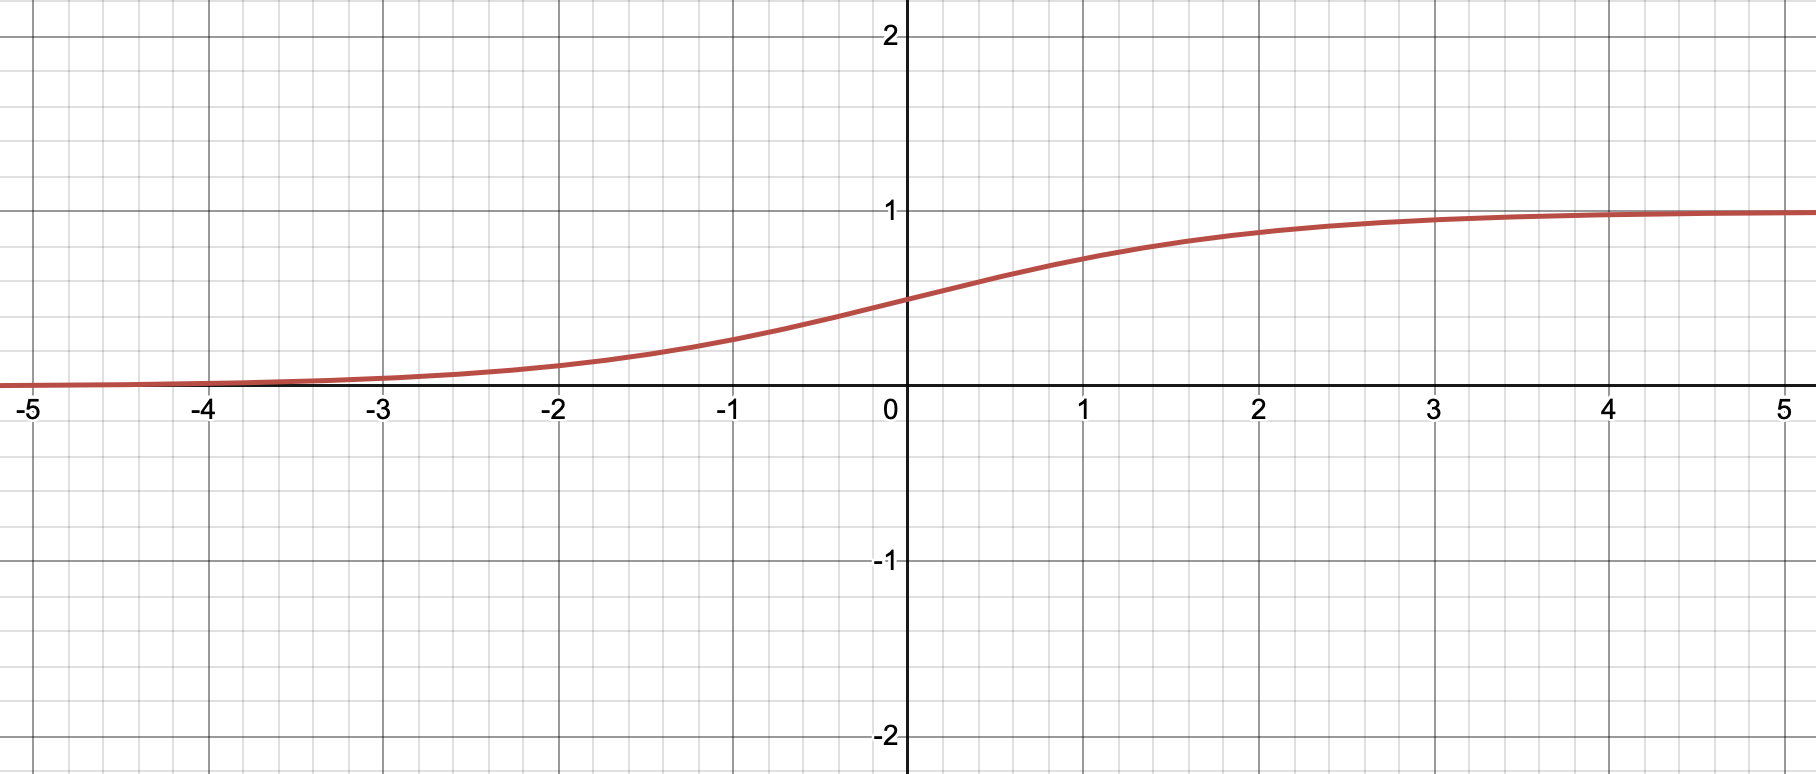

### Advantages of sigmoid function
- Unlike the step function's abrupt transition, the sigmoid function's smooth output allows for a more nuanced representation of probabilities between 0 and 1. This is crucial for logistic regression to model the gradual change in the likelihood of a class membership.
- The sigmoid function has a non-zero gradient throughout its entire range. This is essential for gradient-based optimization algorithms used to train most ML models. The non-zero gradient allows the model to learn effectively by back propagating the error and adjusting the weights of the model based on how they affect the output probability.

### Code implementation of sigmoid function

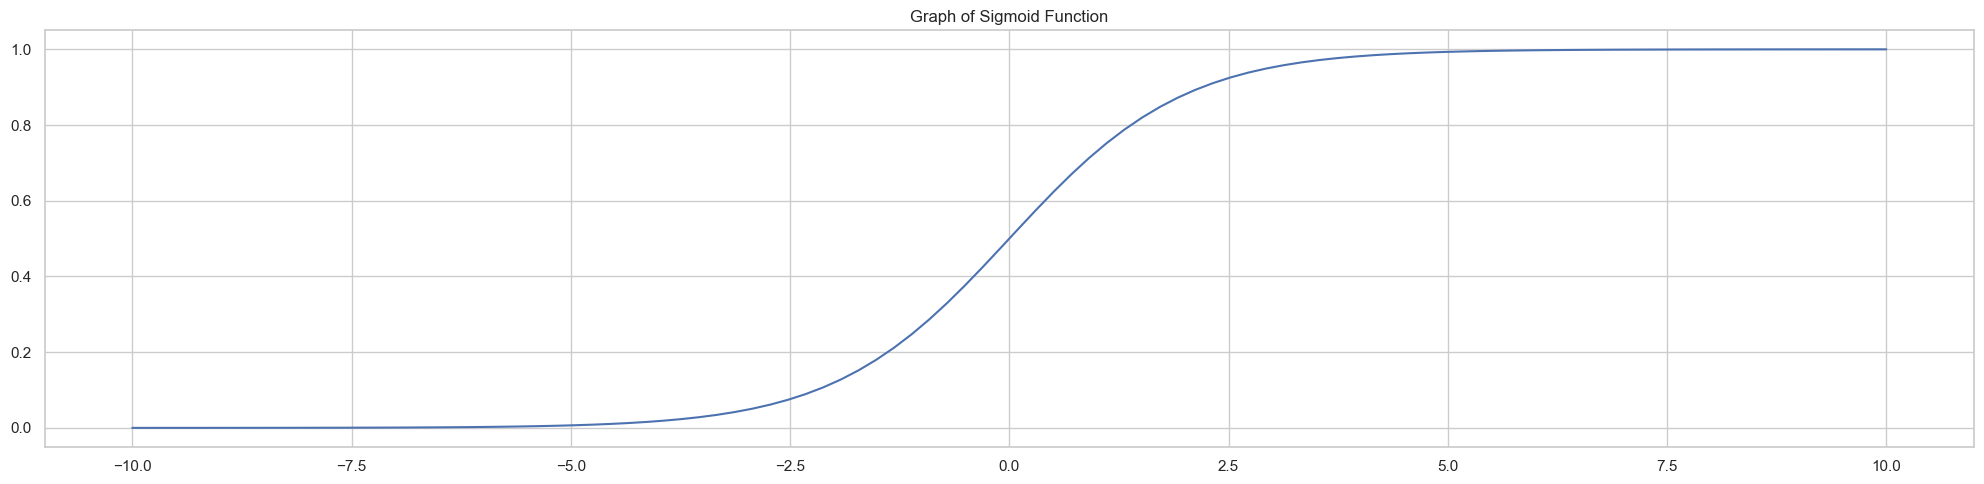

In [3]:
def sigmoid_func(x):
	return 1/ (1 + (np.e ** -x))

# plotting the values
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 100)
y = sigmoid_func(x)
plt.plot(x, y)
plt.title("Graph of Sigmoid Function")
plt.tight_layout()
plt.show()

# Connecting with Probabilities
- For some given value of distance of a point from the line z, say, $z = (w^T * x) + w_0$, the sigmoid function is applied. As a result a predicted value is obtained (y_pred). The range of the predicted value is between 0 and 1.
- The valu obtained after applying sigmoid function is the probability value of a point belonging to class 0, or class 1. If the point is very far away, the probability of it belonging to a certain class is less.
- In most of the scenarios, all the points are modeled with respect to conditional probability of them belonging to class 1.
- In order to find if some point belongs to class 0, $(1 - P(Class_1))$ can be found.
- Say for a point $z_1$, there is a 0.26 chance of the point belonging to class 1, then there is a 0.74 chance of the point belonging to class 0.

# How to Find the Best Values of W's?
- The predicted value is given by, $y_i = \sigma(w^T * x + w_0)$.
- The MSE for linear regression is given by, $MSE = \frac{1}{n} \sum_{i = 1}^{n}(y_i - (w^Tx + w_0))^2$.
- The MSE for logistic regression is given by, $MSE = \frac{1}{n} \sum_{i = 1}^{n}(y_i - \sigma(w^Tx + w_0))^2$.
- The above equation is differentiable, but there is one big challenge, i.e., if the graph of this function is plotted, it would turn out to be a non-convex function.
- Logistic regression is a classification task, where the model predicts class labels (0 or 1) for data points. MSE is not ideal for classification because it penalizes the model for even small deviations from the target class label, regardless of the direction of the error. Hence, this is not preferred as the cost or loss function for logistic regression.

# What is a Non-Convex Function?
In mathematics, a non-convex function is a function whose graph does not curve inwards everywhere.

### Convex v. non-convex
- Convex function: Imagine placing a straight edge on the function's graph. If the entire graph falls below (or above) the straight edge for any two points on the curve, the function is convex. Intuitively, it looks like a bowl or a cup.
- Non-convex function: On the other hand, if the straight edge touches or intersects the curve somewhere in between those two points, the function is non-convex. It can have dips, bumps, or a combination of both, making it look like a hilly landscape.

### Impact in optimization
- Finding the minimum: Many optimization problems involve finding the minimum value (or maximum) of a function. For convex functions, there's only one global minimum (or maximum), which is the lowest (or highest) point on the curve. This makes it easier for optimization algorithms to find the optimal solution.
- Challenges with non-convex functions:  Non-convex functions can have multiple local minima (or maxima). These are dips (or bumps) in the curve that are lower (or higher) than their immediate surroundings, but not necessarily the absolute minimum (or maximum). Optimization algorithms might get stuck in these local minima, leading to suboptimal solutions.

### Analogy
Imagine searching for the lowest point in a valley. In a convex valley (like a bowl), there's only one bottom point. In a non-convex valley with multiple dips, you might end up in a local dip and miss the actual lowest point.

### Non-convexity in ML
Non-convex functions arise in various machine learning models, including logistic regression with the MSE loss function (as you mentioned). Understanding non-convexity helps us choose appropriate optimization algorithms and loss functions to train models effectively.

### Further reading
https://rumn.medium.com/convex-vs-non-convex-functions-why-it-matters-in-optimization-for-machine-learning-39cd9427dfcc#:~:text=A%20convex%20loss%20function%20has,to%20find%20the%20global%20minimum

# Negative Log-Likelihood Function/ Log-Loss Function
The problem of the loss function is divided into 2 parts,
1. When $y_i = 1$. The slope is a downward curved slope starting from top-left and ending at bottom-right. This is defined by $[-log(y_{pred})]$.

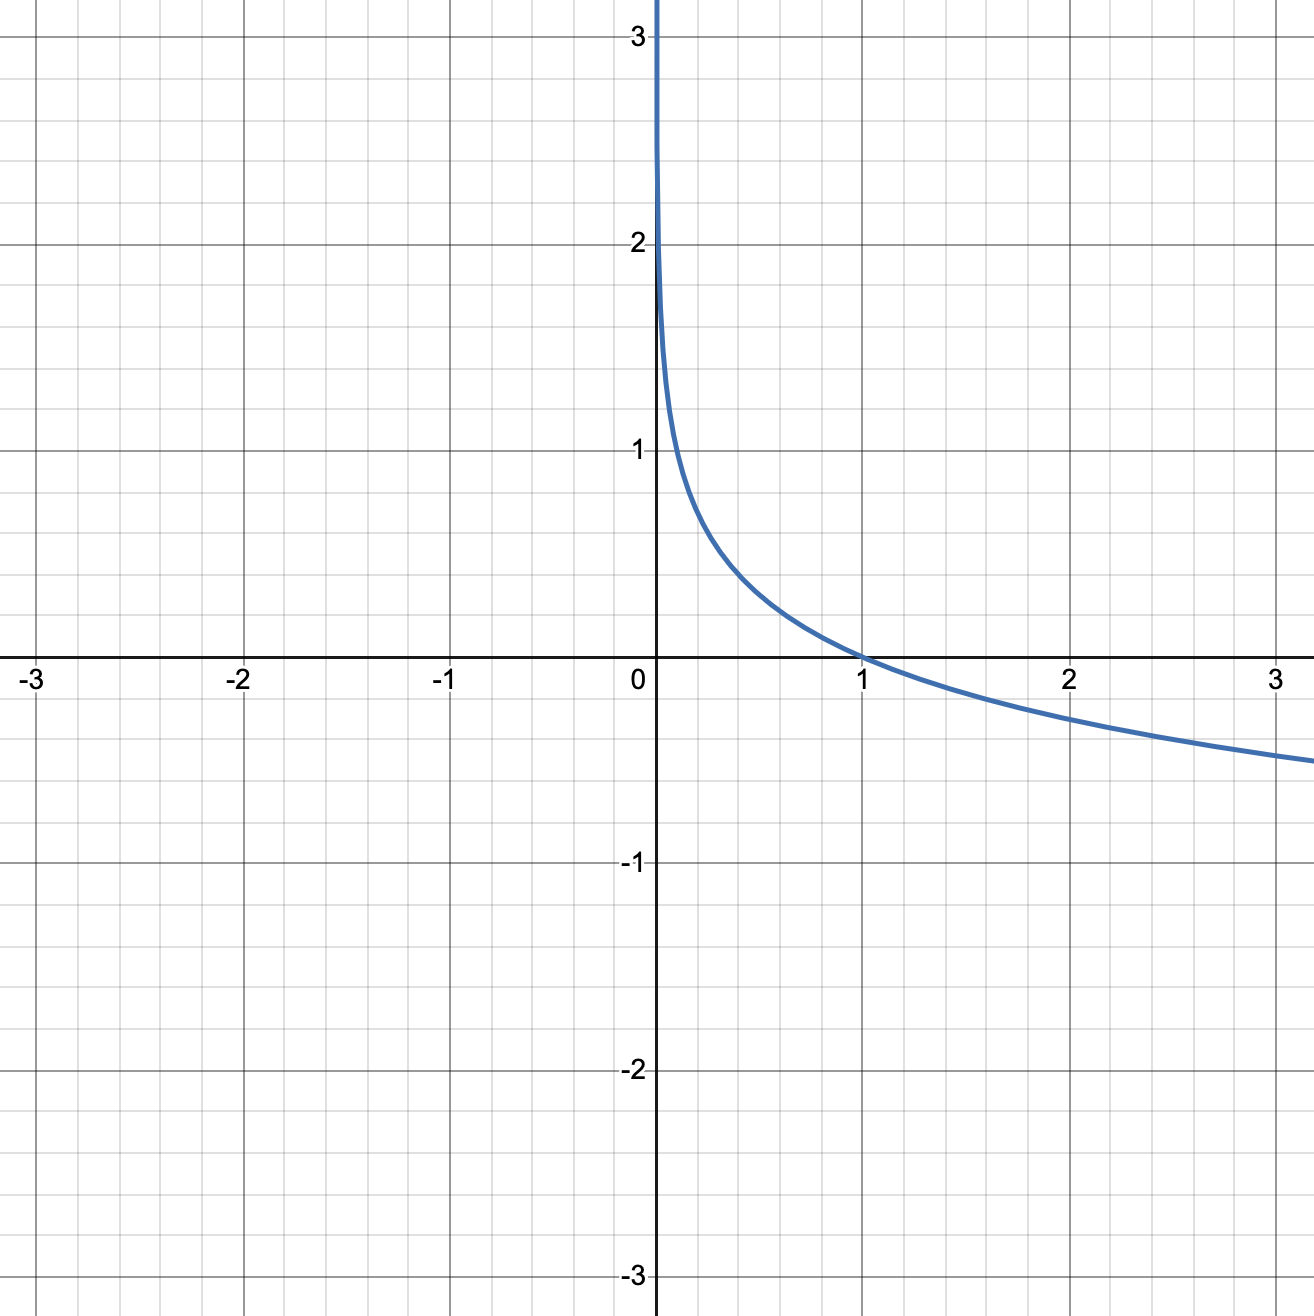

2. When $y_i = 0$. The slope is an upward curved slope starting from bottom-left and ending at top-right. This is defined by $[-log(1 - y_{pred})]$.

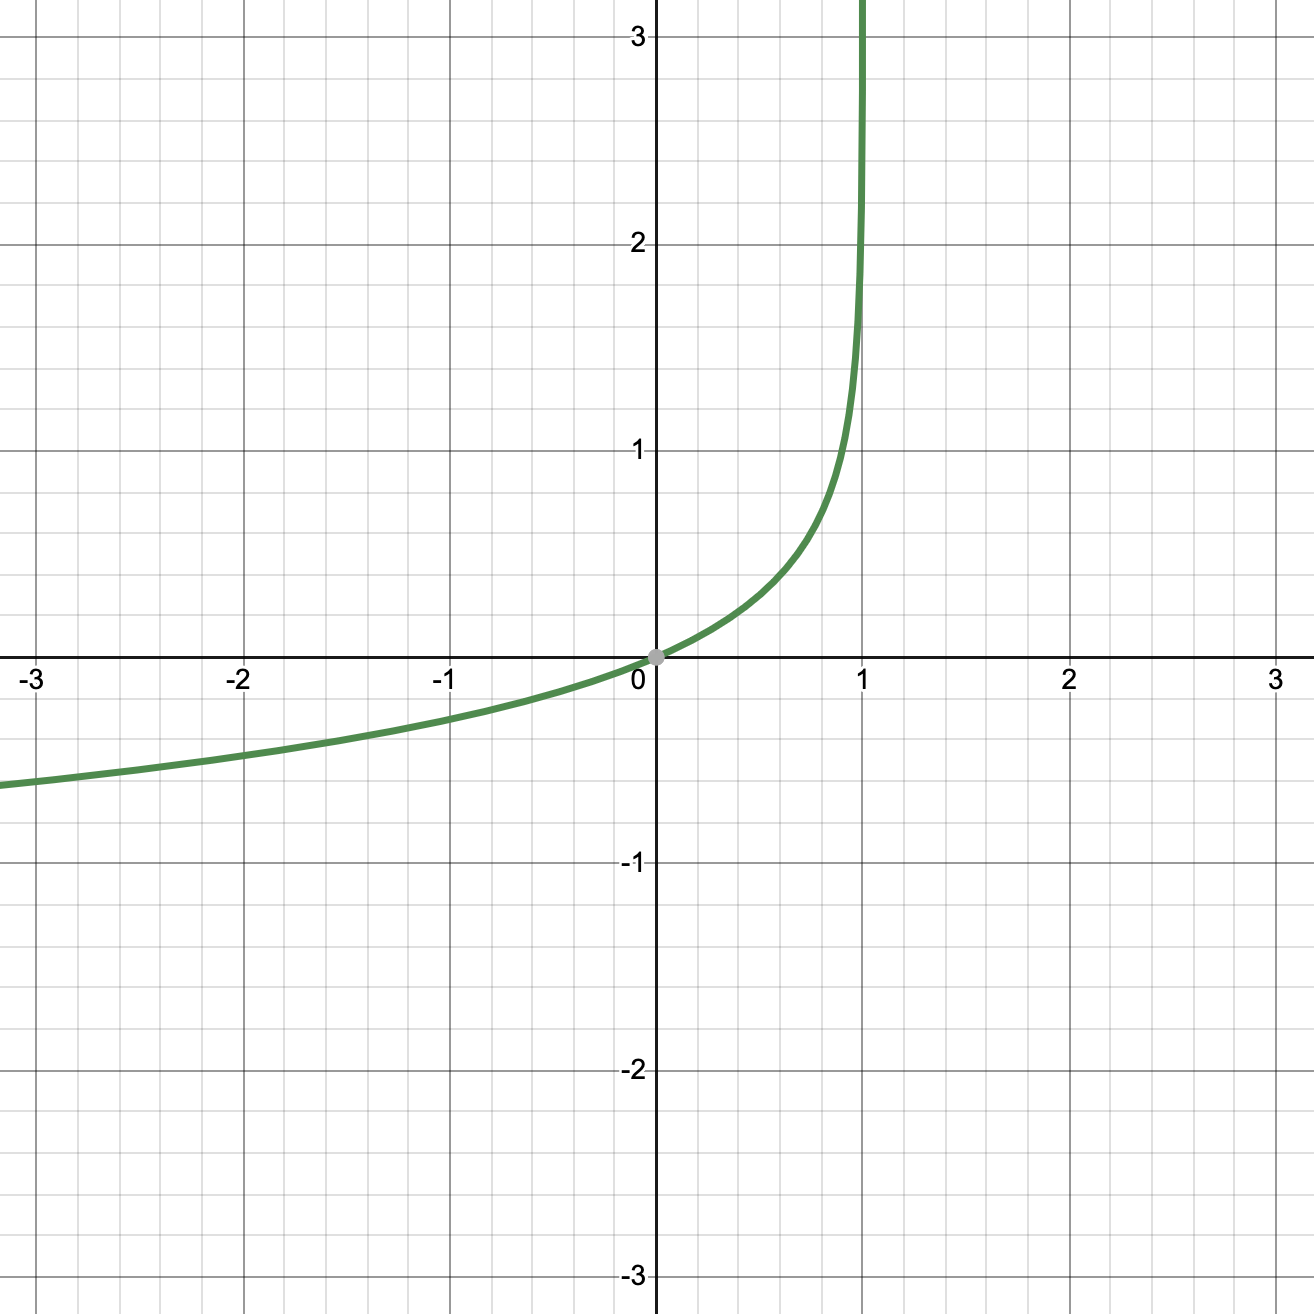

Consider that prediction is being made for class 1,
- Case 1: If $y_i = 1$, and $y_{pred} = 0$ the error would be approaching infinity.
- Case 2: If $y_i = 1$, and $y_{pred} = 0.99$, the error would be approaching 0 (i.e., approximately 0). For positive class it looks like a good function.
- Case 3: If $y_i = 0$, and $y_{pred} = 0.99$, the error would be very high as the predicted value says it belongs to class 1 with 0.99 chance, but the actual label says it belongs to class 0. Therefore, error is approaching infinity.
- Case 4: If $y_i = 0$, and $y_{pred} = 0$ the error would be approaching 0 (i.e., approximately 0).

The mathematical equation of log-loss is defined as,

$\large{\text{Log Loss} = (-y_i * \log(y_{pred})) - (1-y_i)*\log(1- y_{pred})}$

At any given point of time, only one part of the above equation will be active. Meaning, if the actual label is $y_i = 1$, then $(-y_i * \log(y_{pred}))$ will be active. If the actual label is $y_i = 0$, then $(-(1-y_i)*\log(1- y_{pred}))$ will be active.

### Code implementation of Log-Loss

In [4]:
def log_loss(y, y_cap):
	loss = - (y * np.log(y_cap)) - ((1 - y) * np.log(1 - y_cap))
	return loss

# Why is Negative Log-Loss Function Preferred as the Loss Function?
The negative log loss function, also known as the logistic loss or cross-entropy loss, is the preferred choice for logistic regression due to several key advantages over the Mean Squared Error (MSE) function.

### Convexity
- MSE challenge: The MSE function is non-convex with respect to the model's weights in logistic regression. This means the MSE landscape can have multiple local minima, making it difficult for optimization algorithms like gradient descent to find the global minimum during training. This can lead to suboptimal model performance.
- Cross-entropy advantage: The negative log-loss function on the other hand, is convex with respect to the weights. This creates a smoother landscape for optimization, allowing the algorithm to more efficiently navigate towards the global minimum, resulting in better convergence and potentially improved model performance.

### Focus on classification
- MSE's incapability: MSE is better suited for regression problems where the goal is to predict the continuous values. In logistic regression, the task is that of classification, where the aim is to predict discrete class labels (typically 0 or 1). MSE penalizes the difference between the predicted probability and the actual class label equally, regardless of the direction of the error. A prediction of 0.9 v. 0.1 for a class label of 1 is treated similarly by MSE.
- Cross-entropy alignment: The negative log loss function specifically addresses this issue. It focuses on minimizing the difference between the predicted probability distribution and the actual class distribution (0 or 1). It penalizes the model more heavily for significant deviations from the target class. For example, a prediction of 0.1 for a class label of 1 (heads in a coin flip analogy) incurs a higher penalty than a prediction of 0.9. This aligns well with the classification goals of logistic regression.

### Connection to maximum likelihood estimation
- Logistic Regression Goal: Logistic regression aims to find the model parameters (weights) that maximize the likelihood of observing the training data given the true class labels.
- Negative Log Loss and Likelihood: The negative log loss function has a direct connection to the likelihood function used in logistic regression. Minimizing the negative log loss function is equivalent to maximizing the likelihood function. This provides a statistically sound foundation for training the model.

### In summary, the negative log loss function offers several advantages over MSE in logistic regression
- It ensures a smoother optimization landscape (convexity).
- It aligns better with the classification goals by focusing on class label probabilities.
- It has a connection to the likelihood function, providing a statistically sound basis for model training.

These benefits contribute to more efficient training and potentially better classification performance in logistic regression models.

# Optimizing the Loss Function
The loss function is given by,

$\large{\text{Log Loss} = (-y_i * \log(y_{pred})) - (1-y_i)*\log(1- y_{pred})}$

The goal is to find, $\frac{∂L}{∂W}$, i.e., the partial derivative of L with respect to W.

For any, $\sigma(z) = \frac{1}{(1 + e^{-z})}$, applying the quotient rule results in,

$\sigma'(z) = \sigma(z) * (1 - \sigma(z))$

Where,
- $z = \sigma(w^Tx + w_0)$

Let the loss equation be divided into 2 parts, such that,
- $A = (-y_i * \log(y_{pred}))$
- $B = - (1-y_i)*\log(1- y_{pred})$

Partial derivative of A with respect to $w_j$ is,

$\frac{∂A}{∂w_j} = \frac{∂A}{∂y_{pred}}*\frac{∂y_{pred}}{∂z}*\frac{∂z}{∂w_j}$

Therefore,

$\frac{∂A}{∂y_{pred}} = \frac{y_i}{y_{pred}}$

$\frac{∂y_{pred}}{∂z} = y_{pred}*(1 - y_{pred})$

$\frac{∂z}{∂w_j} = x_j$

Finally,

$\frac{∂A}{∂w_j} = -(\frac{y_i}{y_{pred}} * y_{pred}*(1 - y_{pred}) * x_j)$

Similarly, the partial derivative of B with respect to $w_j$ is,

$\frac{∂B}{∂w_j} = \frac{∂B}{∂(1 - y_i)}*\frac{∂(1 - y_i)}{∂y_{pred}}*\frac{∂y_{pred}}{∂z}*\frac{∂z}{∂w_j}$

Therefore,

$\frac{∂B}{∂(1 - y_i)} = \frac{(1 - y_i)}{(1 - y_{pred})}$

$\frac{∂(1 - y_i)}{∂y_{pred}} = -1$

$\frac{∂y_{pred}}{∂z} = y_{pred}*(1 - y_{pred})$

$\frac{∂z}{∂w_j} =x_j$

Finally,

$\frac{∂B}{∂w_j} = -((\frac{(1 - y_i)}{(1 - y_{pred})})*(-1)*(y_{pred}*(1 - y_pred))*(x_j))$

$\frac{∂B}{∂w_j} = ((1-y_i)*y_{pred}*x_j)$

Therefore,

$\frac{∂L}{∂w_j} = \frac{∂A}{∂w_j} + \frac{∂B}{∂w_j}$

$\frac{∂L}{∂w_j} = (-(\frac{y_i}{y_{pred}} * y_{pred}*(1 - y_{pred}) * x_j)) + (((1-y_i)*y_{pred}*x_j))$

The gradient descent equation is,

$W_j = W_j - \eta(\frac{∂A}{∂W_j} + \frac{∂B}{∂W_j})$

# Code Implementation of Logistic Regression

### `sklearn` implementation of logistic regression

In [5]:
df = pd.read_csv("churn_logistic.csv")
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [8]:
x = df.drop(columns = ["Churn"])
x.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [ ]:
columns = 

In [7]:
y = df["Churn"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64